# Ejercicios Pair Programming 
## Lección 18 - Regresión Logística Random Forest

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Random Forest en este tipo de problemas. Los objetivos de este pair programming :

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
from tqdm import tqdm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargamos el dataframe
df = pd.read_csv("resultados_estudiantes_sin_estandarizar_codificados.csv", index_col=0)

In [3]:
df.head()

,gender,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
0,0.0,4,1,72.0,72.0,74.0,0.0,1.0,0.0,0.0,0.0,0,1
1,0.0,3,0,69.0,90.0,88.0,0.0,0.0,1.0,0.0,0.0,0,1
2,0.0,5,1,90.0,95.0,93.0,0.0,1.0,0.0,0.0,0.0,0,1
3,1.0,2,1,47.0,57.0,44.0,1.0,0.0,0.0,0.0,0.0,1,0
4,1.0,3,1,76.0,78.0,75.0,0.0,0.0,1.0,0.0,0.0,0,1


Ajustad un modelo de Random Forest a nuestros datos.

In [5]:
# Separamos los datos en X e y.

X = df.drop("gender", axis = 1)
y = df["gender"]

In [6]:
# Dividimos nuestros datos en train y test para poder evaluar la bondad de nuestro modelo.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
# Definimos un diccionario con los hiperparámetros que queremos modificar y los valores que queremos. 

param = {"max_depth": [2, 4, 6], 
        "max_features": [1, 2, 3],
        "min_samples_split": [10, 40, 90],
        "min_samples_leaf": [10, 40, 90]} 

In [31]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42),
            param_grid= param, 
            cv=10, 
            verbose=-1) 

In [32]:
# Ajustamos el modelo que acabamos de definir en el GridSearch.

gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 40, 90],
                         'min_samples_split': [10, 40, 90]},
             verbose=-1)

In [33]:
# Saquemos ahora cual es nuestro mejor bosque.

bosque = gs_rf.best_estimator_
bosque

RandomForestClassifier(max_depth=6, max_features=3, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

Nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 10, que usa 3 variables predictoras para construir el modelo y que tiene un min_samples_leaf y un min_samples_split de 10 y un random_state de 42. 

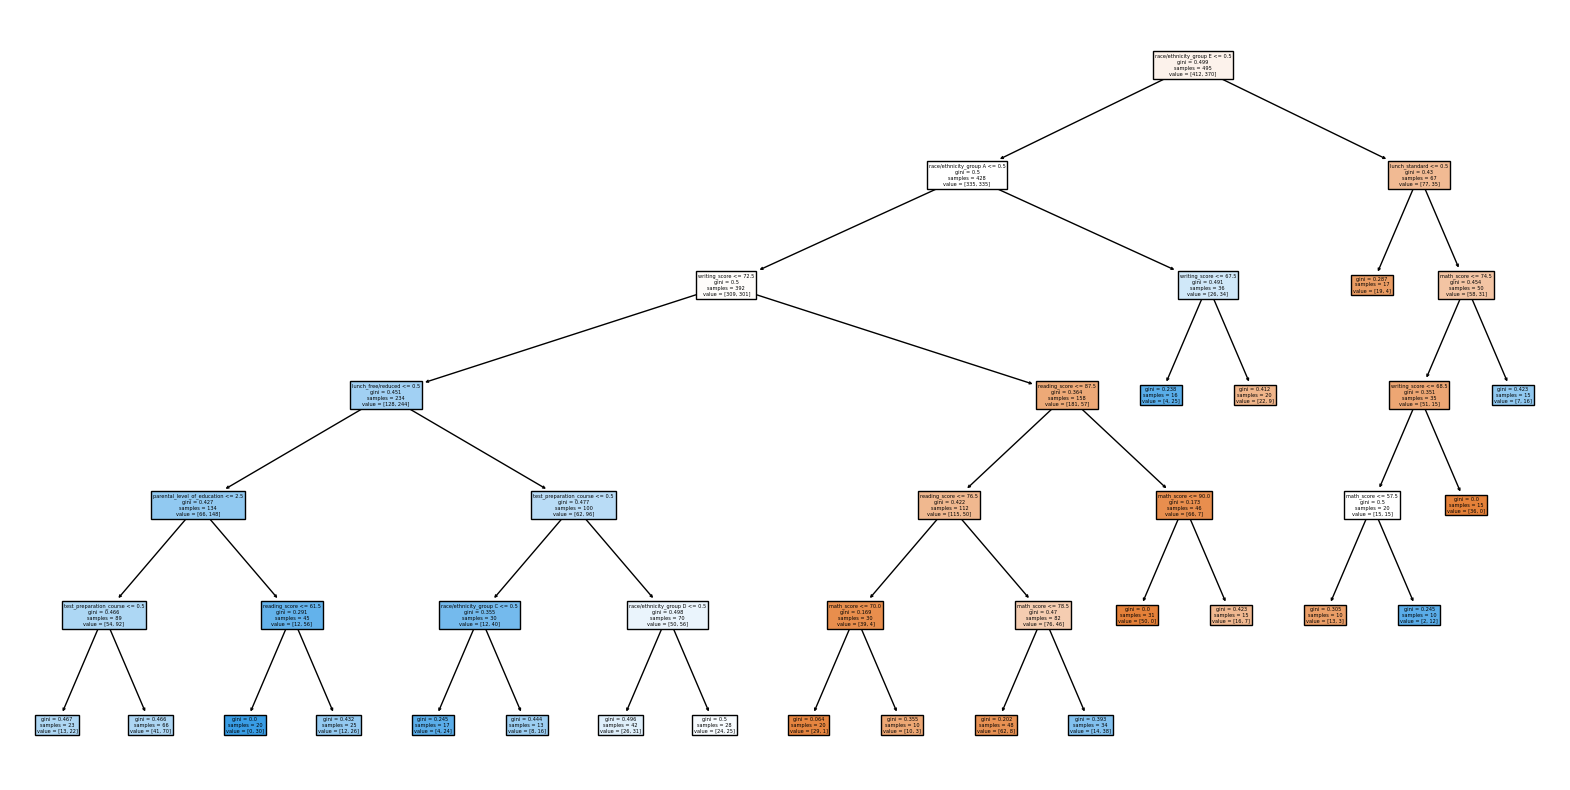

In [34]:
# Dibujemos los árboles de nuestro bosque.

fig = plt.figure(figsize=(20, 10))
tree.plot_tree(bosque.estimators_[0], feature_names= x_train.columns, filled = True)
plt.show()

Hemos decidido sacar solo un árbol de nuestro bosque ya que nos aparecerán muchas imágenes y el ordenador puede ralentizarse. Obviamente con esta gráfica no podemos explicar nuestro modelo, ya que solo hemos sacado una parte del bosque. Analizaremos las métricas de nuestro bosque para ver si nuestro modelo es bueno o no. 

In [35]:
# Sacamos las predicciones de nuestro modelo
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

Calculad las métricas a nuestro nuevo modelo.

In [36]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [37]:
# Sacamos las métricas de nuestro modelo Random Forest.

df_random = metricas(y_test, y_pred_test_rf,y_train, y_pred_train_rf, "Random Forest")
df_random

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.770408,0.804348,0.732673,0.766839,0.541675,test,Random Forest
1,0.905371,0.914601,0.885333,0.899729,0.810185,train,Random Forest


Comparad las métricas con los modelos hechos hasta ahora. ¿Cuál es mejor?

In [38]:
# Cargaremos el csv de métricas que creamos en el pair anterior donde sacamos del modelo de regresión logística
# sus métricas para poder compararlo con éste. 

df_resultados_todo = pd.read_csv("resultados_estudiantes_metricas_decision_sin_estandarizar.csv", index_col = 0)
df_resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.852041,0.882979,0.821782,0.851282,0.704451,test,Regresión logistica Sin Estandarizar
1,0.905371,0.905660,0.896000,0.900804,0.810345,train,Regresión logistica Sin Estandarizar
2,0.795918,0.827957,0.762376,0.793814,0.592473,test,Decision tree II
3,0.843990,0.842818,0.829333,0.836022,0.687259,train,Decision tree II


In [26]:
# Concatenamos los resultados.

df_total= pd.concat([df_resultados_todo, df_random], axis = 0).reset_index(drop=True)
df_total

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.852041,0.882979,0.821782,0.851282,0.704451,test,Regresión logistica Sin Estandarizar
1,0.905371,0.905660,0.896000,0.900804,0.810345,train,Regresión logistica Sin Estandarizar
2,0.795918,0.827957,0.762376,0.793814,0.592473,test,Decision tree II
3,0.843990,0.842818,0.829333,0.836022,0.687259,train,Decision tree II
4,0.790816,0.819149,0.762376,0.789744,0.582155,test,Random Forest
5,0.923274,0.924528,0.914667,0.919571,0.846225,train,Random Forest


In [39]:
# Pongamos un poco de color a nuestro dataframe para ver la comparación de los datos de una forma un poco más amigable. 
df_total.style.background_gradient(cmap='seismic')

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.852041,0.882979,0.821782,0.851282,0.704451,test,Regresión logistica Sin Estandarizar
1,0.905371,0.905660,0.896000,0.900804,0.810345,train,Regresión logistica Sin Estandarizar
2,0.795918,0.827957,0.762376,0.793814,0.592473,test,Decision tree II
3,0.843990,0.842818,0.829333,0.836022,0.687259,train,Decision tree II
4,0.790816,0.819149,0.762376,0.789744,0.582155,test,Random Forest
5,0.923274,0.924528,0.914667,0.919571,0.846225,train,Random Forest


Visualizando esta tabla comparativa de métricas vemos que el modelo Random Forest nos presenta overfitting, ya que los valores del train son mucho menores que los del test, por lo que no podremos tener en cuenta este modelo (hemos realizado el cambio de hiperparámetros varias veces pero sin éxito).

Por tanto, nos seguiremos quedando con "Regresión Logística Sin Estandarizar" ya que sus valores son mucho mejores que los que nos da el modelo "Decision Tree II".

In [40]:
# Guardamos el dataframe con todas las métricas para comparar en el próximo pair las métricas obtenidas en el Random Forest.

df_total.to_csv("resultados_estudiantes_metricas_total.csv")

Como conclusión final entendemos que el mejor método es la "Regresión Logística Sin Estandarizar", que aunque no nos aporta tantos datos de los que poder sacar nuestras propias conclusiones, sus resultados sabemos que son mucho más fiables. A través de los pair hemos ido analizando cada una de las columnas y entendemos que los resultados obtenidos en los exámenes son las variables predictoras más importantes, siendo éstas de las que sacar el número de hombres y mujeres las que hacen que nuestro modelo prediga si hay más mujeres o no.

Happy coding 📊📈📉